# Exploratory Data Analysis

## Imports

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [66]:
# Load the dataset

file_path = '../data/clean_data.csv'
df = pd.read_csv(file_path)

print('Data size',df.shape)
df.head()

Data size (38338, 13)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,class
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,0
3,35,management,married,tertiary,0,231,1,0,5,may,139,1,0
4,28,management,single,tertiary,0,447,1,1,5,may,217,1,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38338 entries, 0 to 38337
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        38338 non-null  int64 
 1   job        38338 non-null  object
 2   marital    38338 non-null  object
 3   education  38338 non-null  object
 4   default    38338 non-null  int64 
 5   balance    38338 non-null  int64 
 6   housing    38338 non-null  int64 
 7   loan       38338 non-null  int64 
 8   day        38338 non-null  int64 
 9   month      38338 non-null  object
 10  duration   38338 non-null  int64 
 11  campaign   38338 non-null  int64 
 12  class      38338 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 3.8+ MB


## Class Distribution

In [68]:
label_pct = df['class'].value_counts(normalize = True)*100
label_ct =  df['class'].value_counts()
pd.DataFrame({'labels': label_pct.index, 'count': label_ct.values, 'percentage': label_pct.values})

,labels,count,percentage
0,0,35546,92.717408
1,1,2792,7.282592


## Descriptive Statistics

In [69]:
df.drop('class', axis =1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,38338.0,40.390057,9.589451,19.0,33.0,39.0,48.0,95.0
default,38338.0,0.020241,0.140826,0.0,0.0,0.0,0.0,1.0
balance,38338.0,1266.471308,2892.821124,-8019.0,54.0,403.0,1311.0,102127.0
housing,38338.0,0.605900,0.488663,0.0,0.0,1.0,1.0,1.0
loan,38338.0,0.177344,0.381964,0.0,0.0,0.0,0.0,1.0
day,38338.0,16.016094,8.261625,1.0,8.0,17.0,21.0,31.0
duration,38338.0,255.102170,259.771013,0.0,100.0,175.0,313.0,4918.0
campaign,38338.0,2.873441,3.198993,1.0,1.0,2.0,3.0,58.0


### Age Vs Target

- Ages 85, 90 and 95 had 100% Term deposit subcription rate
- Ages 61 to 79 had good amount of subscription rate

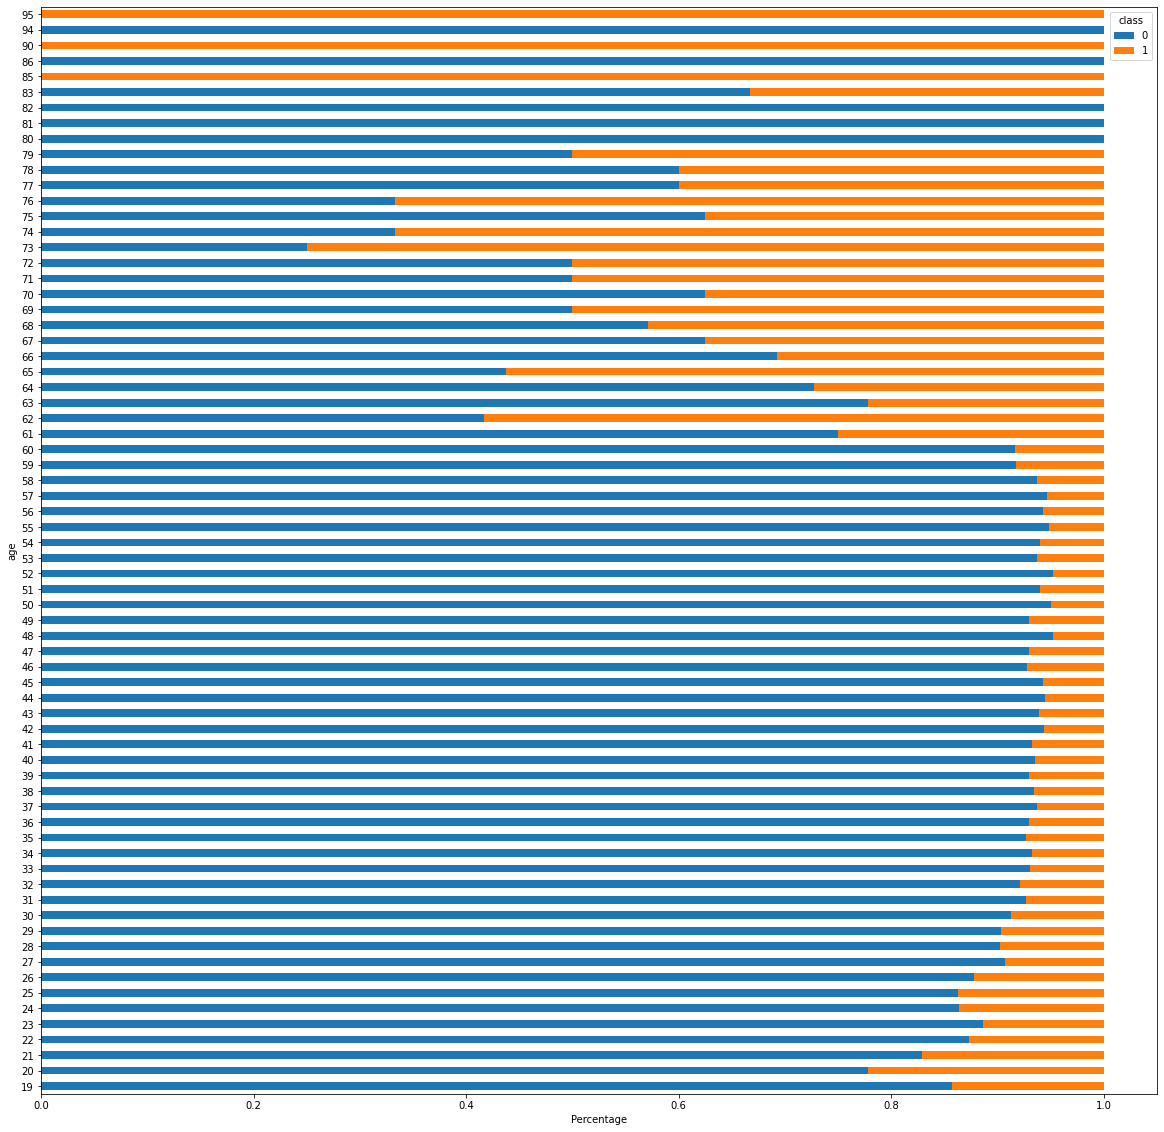

In [90]:
pvt_age = pd.crosstab(index = df['age'], columns = df['class'], normalize= 'index')
pvt_age.plot(kind = 'barh', stacked = True, figsize = (20,20))
plt.xlabel('Percentage')
plt.show()

### Marital vs Target

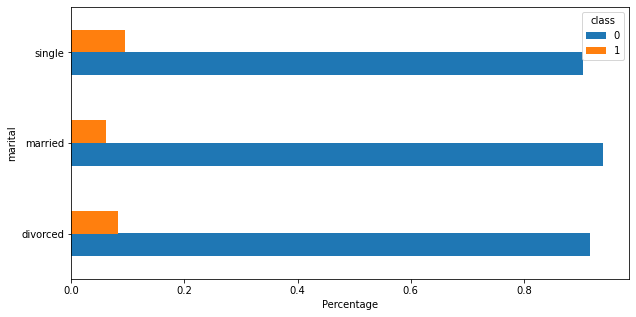

In [71]:
pvt_marital = pd.crosstab(index = df['marital'], columns = df['class'], normalize= 'index')
pvt_marital.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Default Vs Target

- Customers who dont default have slighly greater chance of subscription rate

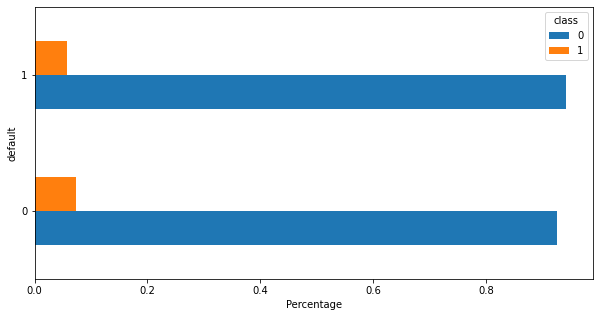

In [72]:
pvt_default = pd.crosstab(index = df['default'], columns = df['class'], normalize= 'index')
pvt_default.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Balance Vs Target

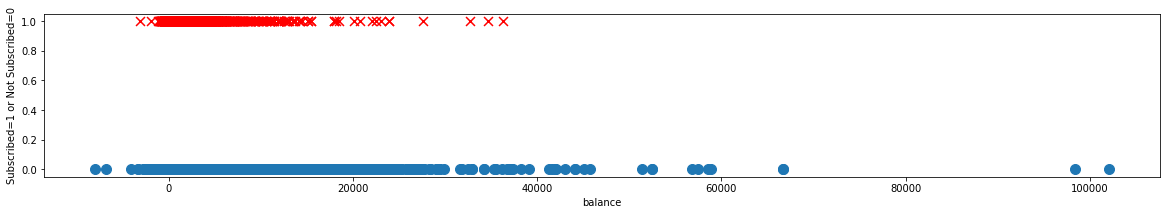

In [73]:

pos = df['class'].to_numpy() == 1
neg = df['class'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 1, figsize=(20, 3), sharey=True)
ax.scatter(df["balance"].to_numpy()[pos], df['class'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(df["balance"].to_numpy()[neg], df['class'].to_numpy()[neg], marker='o', s=100, label="y=0")
ax.set_xlabel('balance')
ax.set_ylabel("Subscribed=1 or Not Subscribed=0")
plt.show()

### Housing Vs Target

- Customers without housing has slighly greater chance of subscribing to term deposit

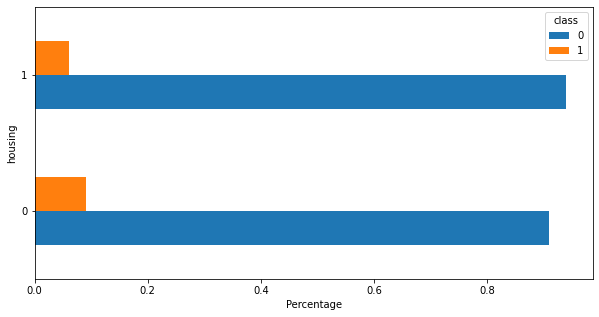

In [74]:
pvt_housing = pd.crosstab(index = df['housing'], columns = df['class'], normalize= 'index')
pvt_housing.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Loan Vs Target

- Customers without loans has slighly greater chance of subscribing to term deposit

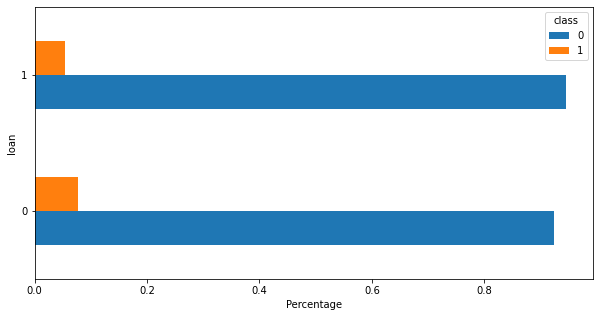

In [75]:
pvt_loan = pd.crosstab(index = df['loan'], columns = df['class'], normalize= 'index')
pvt_loan.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Term rate per day

- On average, students are more likely to subscribe to term deposit
- On average, Customers without housing are more likely to subscribe to term deposit
- Divorced customers are the least likely to subscribe to term deposit

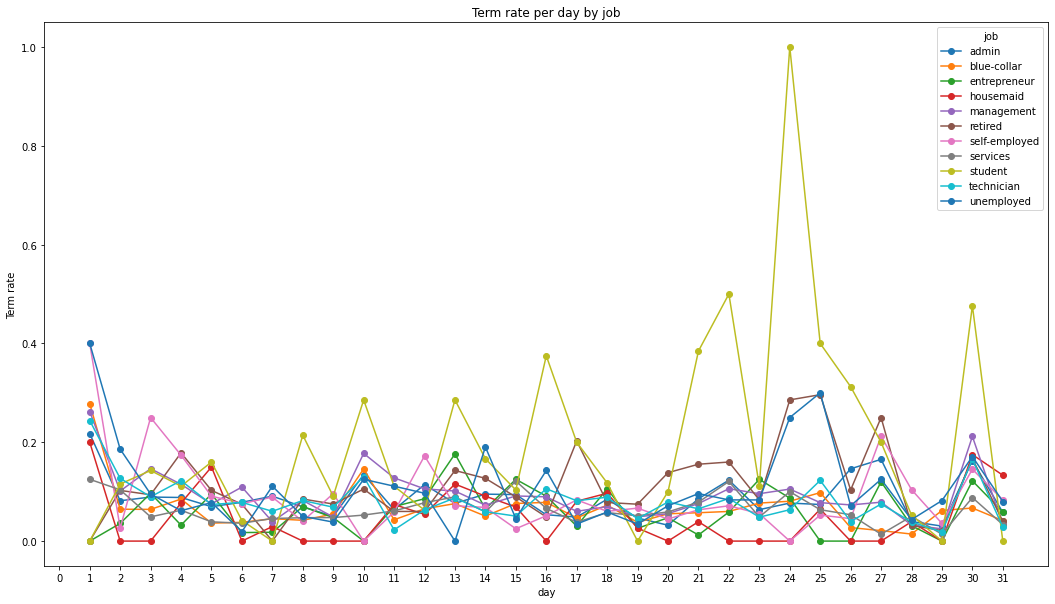

In [96]:
pivot_tab_day1 = df.pivot_table('class', index = 'day', columns = 'job', aggfunc = 'mean')

# plots
pivot_tab_day1.plot(marker = 'o', figsize = (18,10))
plt.xlabel('day')
plt.ylabel('Term rate')
plt.title('Term rate per day by job')
plt.xticks(np.arange(32))
plt.show()

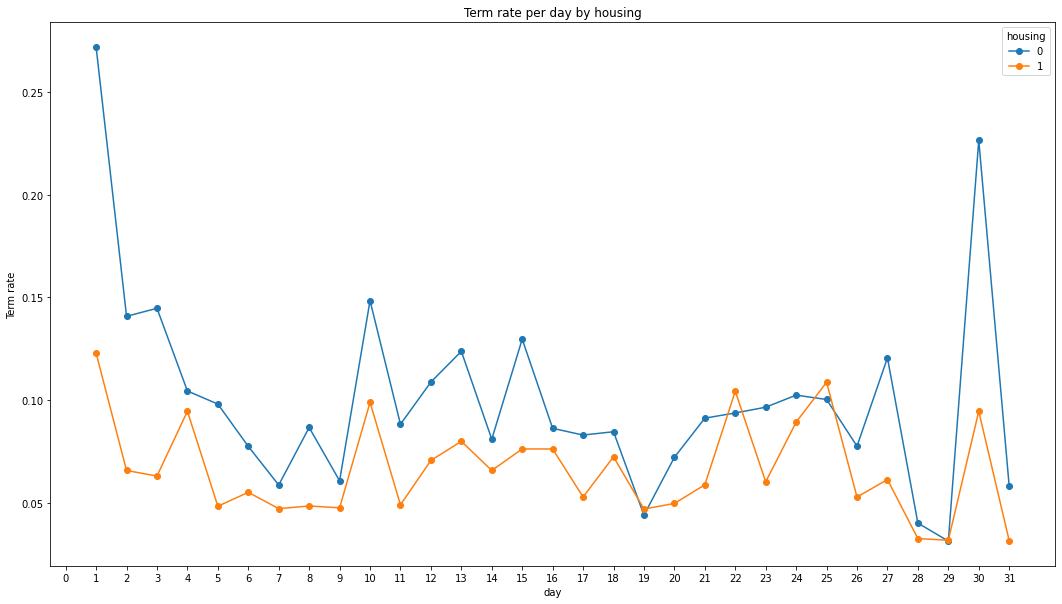

In [77]:
pivot_tab_day2 = df.pivot_table('class', index = 'day', columns = 'housing', aggfunc = 'mean')

# plots
pivot_tab_day2.plot(marker = 'o', figsize = (18,10))
plt.xlabel('day')
plt.ylabel('Term rate')
plt.title('Term rate per day by housing')
plt.xticks(np.arange(32))
plt.show()

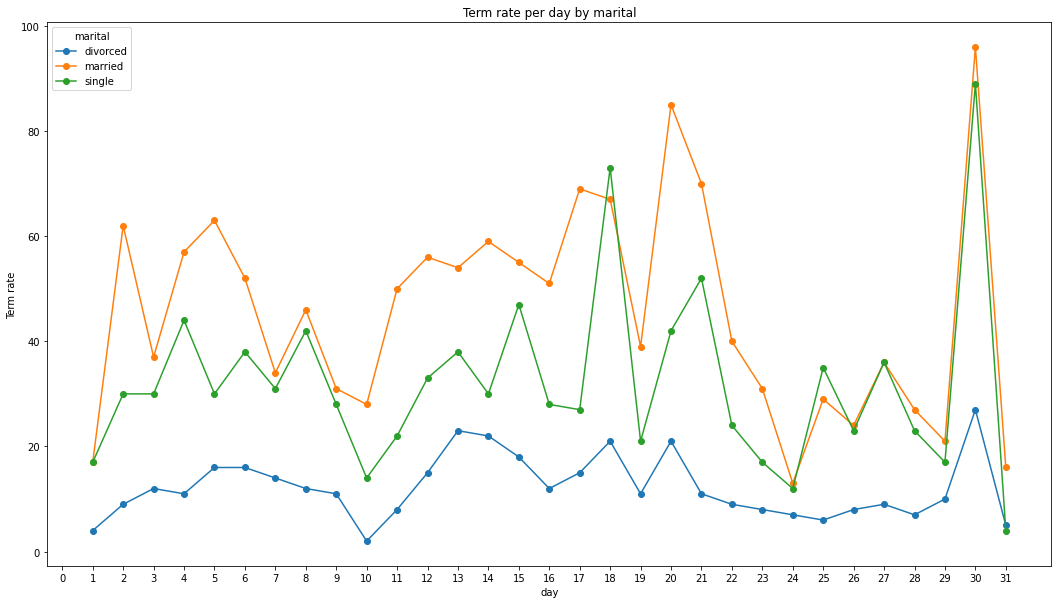

In [93]:
pivot_tab_day3 = df.pivot_table('class', index = 'day', columns = 'marital', aggfunc = 'sum')

# plots
pivot_tab_day3.plot(marker = 'o', figsize = (18,10))
plt.xlabel('day')
plt.ylabel('Term rate')
plt.title('Term rate per day by marital')
plt.xticks(np.arange(32))
plt.show()

### Term rate per month

- There are more subscribtion between April and August


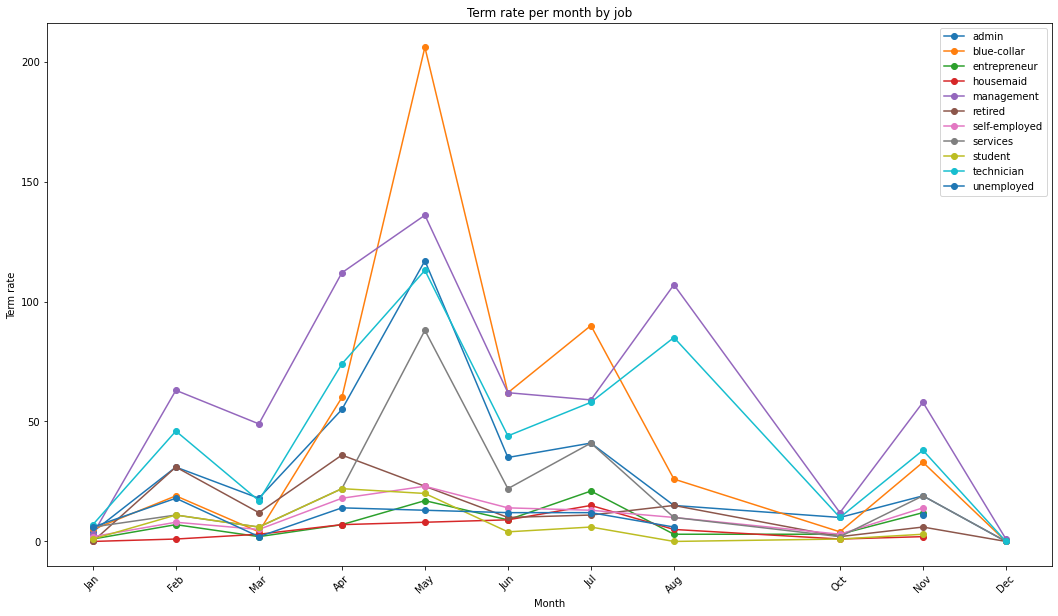

In [78]:
# Change month to integer
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12}
df2 = df.copy()
df2['month'].replace(month_dict, inplace = True)


pivot_tab_mth1 = df2.pivot_table('class', index = 'month', columns = 'job', aggfunc = 'sum')

tick = list(pivot_tab_mth1.index)
labels =['Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 
         'Jul','Aug','Oct', 'Nov','Dec'
        ]


# plots
pivot_tab_mth1.plot(marker = 'o', figsize = (18,10))
plt.xlabel('Month')
plt.ylabel('Term rate')
plt.title('Term rate per month by job')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.show()

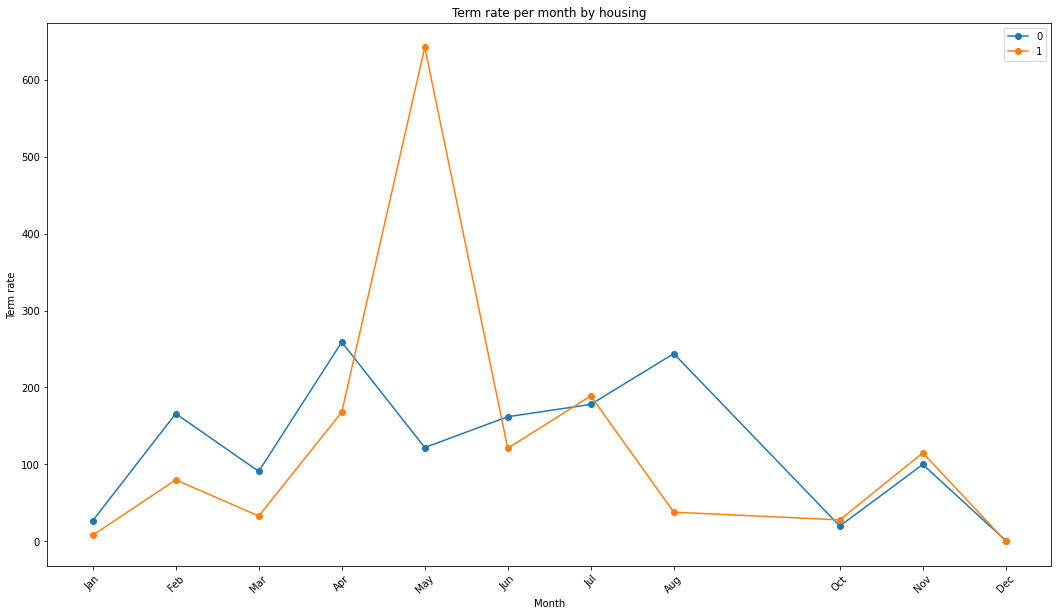

In [79]:
# Change month to integer
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12}
df2 = df.copy()
df2['month'].replace(month_dict, inplace = True)


pivot_tab_mth2 = df2.pivot_table('class', index = 'month', columns = 'housing', aggfunc = 'sum')

tick = list(pivot_tab_mth2.index)
labels =['Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 
         'Jul','Aug','Oct', 'Nov','Dec'
        ]


# plots
pivot_tab_mth2.plot(marker = 'o', figsize = (18,10))
plt.xlabel('Month')
plt.ylabel('Term rate')
plt.title('Term rate per month by housing')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.show()

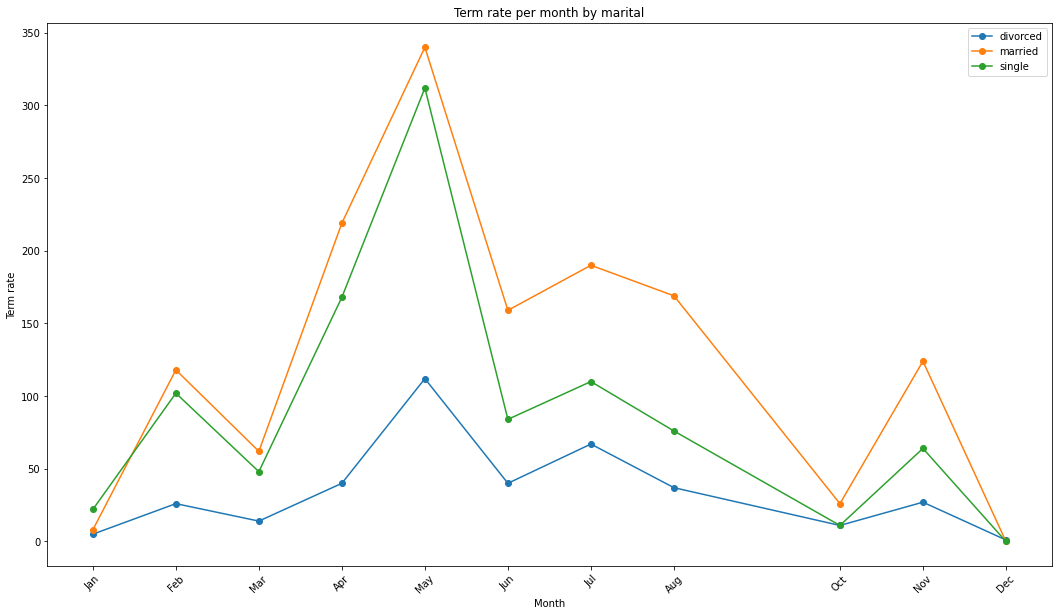

In [94]:
# Change month to integer
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12}
df2 = df.copy()
df2['month'].replace(month_dict, inplace = True)


pivot_tab_mth3 = df2.pivot_table('class', index = 'month', columns = 'marital', aggfunc = 'sum')

tick = list(pivot_tab_mth3.index)
labels =['Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 
         'Jul','Aug','Oct', 'Nov','Dec'
        ]


# plots
pivot_tab_mth3.plot(marker = 'o', figsize = (18,10))
plt.xlabel('Month')
plt.ylabel('Term rate')
plt.title('Term rate per month by marital')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.show()

### Duration Vs Target

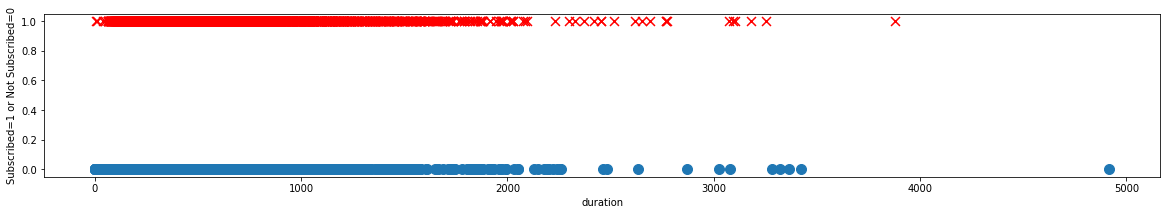

In [80]:
pos = df['class'].to_numpy() == 1
neg = df['class'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 1, figsize=(20, 3), sharey=True)
ax.scatter(df["duration"].to_numpy()[pos], df['class'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(df["duration"].to_numpy()[neg], df['class'].to_numpy()[neg], marker='o', s=100, label="y=0")
ax.set_xlabel('duration')
ax.set_ylabel("Subscribed=1 or Not Subscribed=0")
plt.show()

### Campaign Vs Target

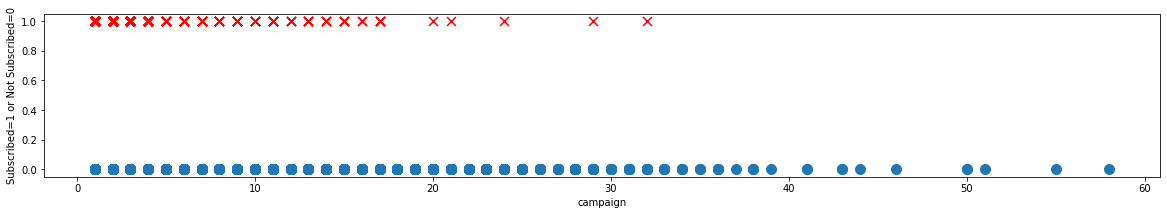

In [81]:
pos = df['class'].to_numpy() == 1
neg = df['class'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 1, figsize=(20, 3), sharey=True)
ax.scatter(df["campaign"].to_numpy()[pos], df['class'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(df["campaign"].to_numpy()[neg], df['class'].to_numpy()[neg], marker='o', s=100, label="y=0")
ax.set_xlabel('campaign')
ax.set_ylabel("Subscribed=1 or Not Subscribed=0")
plt.show()